In [1]:
!pip install ydata_profiling
import numpy as np
#-----------------------------------
import pandas as pd
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=be2c429517553acb1255ce34e8dbad031911f530f71d04e4abb616210568c4a7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
#------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro, probplot
#------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
!unzip '/content/Beijing-Air.zip'

Archive:  /content/Beijing-Air.zip
  inflating: sample_submission.csv.xlsx  
  inflating: beijing_test.csv        
  inflating: beijing_train.csv       


In [4]:
data_air_train = pd.read_csv('/content/beijing_train.csv')
data_air_test = pd.read_csv('/content/beijing_test.csv')

In [5]:
data_air_train.shape

(403776, 18)

In [6]:
data_air_train.isna().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

**Filling missing values with median**

In [7]:
data_air_train['PM2.5'].fillna(data_air_train['PM2.5'].median(), inplace=True)
data_air_train['PM10'].fillna(data_air_train['PM10'].median(), inplace=True)
data_air_train['SO2'].fillna(data_air_train['SO2'].median(), inplace=True)
data_air_train['NO2'].fillna(data_air_train['NO2'].median(), inplace=True)
data_air_train['CO'].fillna(data_air_train['CO'].median(), inplace=True)
data_air_train['O3'].fillna(data_air_train['O3'].median(), inplace=True)
data_air_train['TEMP'].fillna(data_air_train['TEMP'].median(), inplace=True)
data_air_train['PRES'].fillna(data_air_train['PRES'].median(), inplace=True)
data_air_train['DEWP'].fillna(data_air_train['DEWP'].median(), inplace=True)
data_air_train['RAIN'].fillna(data_air_train['RAIN'].median(), inplace=True)
data_air_train['WSPM'].fillna(data_air_train['WSPM'].median(), inplace=True)

**Dropping row no column**

In [8]:
#data_air_train.dropna(subset = ['wd'], inplace=True) -- No need to drop

In [9]:
data_air_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Aotizhongxin
1,2,2013,3,1,1,8.00,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,N,4.70,Aotizhongxin
2,3,2013,3,1,2,7.00,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Aotizhongxin
3,4,2013,3,1,3,6.00,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Aotizhongxin
4,5,2013,3,1,4,3.00,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,N,2.00,Aotizhongxin



Converting year, month, Day, Hour column into datetime format

In [10]:
#data_air_train['dateInt'] = data_air_train['year'].astype(str) + data_air_train['month'].astype(str).str.zfill(2)+ data_air_train['day'].astype(str).str.zfill(2)+data_air_train['hour'].astype(str).str.zfill(2)
#data_air_train['Date'] = pd.to_datetime(data_air_train['dateInt'], format='%Y%m%d%H')

In [11]:
#data_air_train['dateInt']=data_air_train['year'].astype(str) + data_air_train['month'].astype(str).str.zfill(2)+ data_air_train['day'].astype(str).str.zfill(2)
#data_air_train['date'] = pd.to_datetime(data_air_train['dateInt'], format='%Y%m%d')

In [12]:
data_air_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Aotizhongxin
1,2,2013,3,1,1,8.00,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,N,4.70,Aotizhongxin
2,3,2013,3,1,2,7.00,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Aotizhongxin
3,4,2013,3,1,3,6.00,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Aotizhongxin
4,5,2013,3,1,4,3.00,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,N,2.00,Aotizhongxin


#Renaming the columns

**Renaming the columns**



In [13]:
# data_air_train.rename(columns= {'year':'Year',
#                     'month':'Month',
#                     'day':'Day',
#                     'hour':'Hour',
#                     'TEMP':'Temp',
#                     'PRES':'Press',
#                     'DEWP':'DewP',
#                     'RAIN':'Rain',
#                     'wd':'WinDir',
#                     'WSPM':'WinSpeed',
#                     'station':'station'}, inplace=True)

In [14]:
data_air_train.dtypes

REF_NO       int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

Exploratory Data Analysis and Data Visualization


Get only relevent Data

In [15]:
#data_air_train.drop(['year','month','Day','Hour','dateInt'], axis=1).describe()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Wind direction frequency

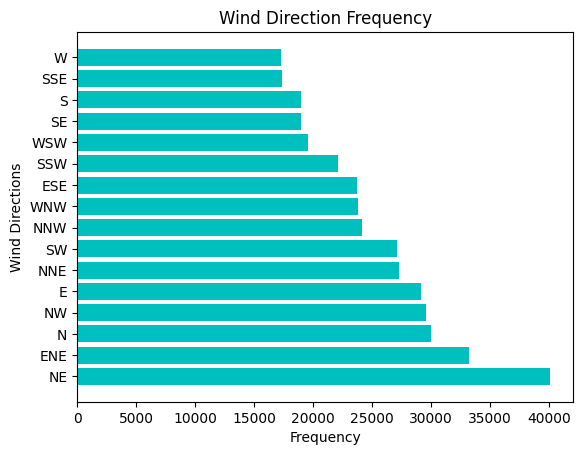

In [17]:
plt.figure()
plt.barh(data_air_train['wd'].value_counts().index, data_air_train['wd'].value_counts(), color='c')
plt.xlabel('Frequency')
plt.ylabel('Wind Directions')
plt.title('Wind Direction Frequency')
plt.show()

Relationship between Temperature and PM2.5

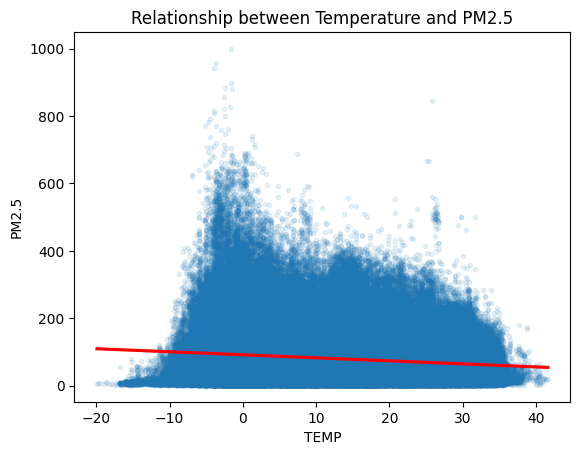

In [18]:
sns.regplot(x='TEMP', y='PM2.5', data=data_air_train, marker='.', scatter_kws={'alpha':0.1}, line_kws={'color':'r'})
plt.title('Relationship between Temperature and PM2.5')
plt.show()

Relationship between Dew Point and PM2.5

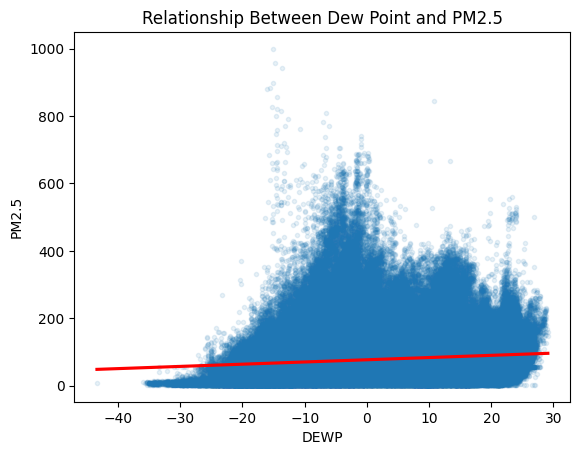

In [19]:
sns.regplot(x='DEWP', y='PM2.5', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between Dew Point and PM2.5')
plt.show()

Relationship Between SO2 and PM2.5

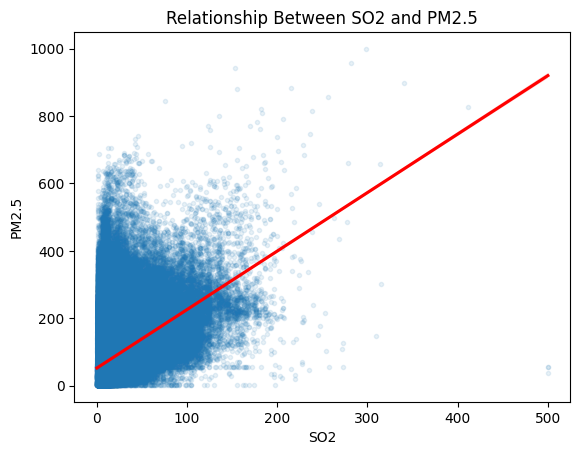

In [20]:
sns.regplot(x='SO2', y='PM2.5', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between SO2 and PM2.5')
plt.show()

Relationship Between NO2 and PM10

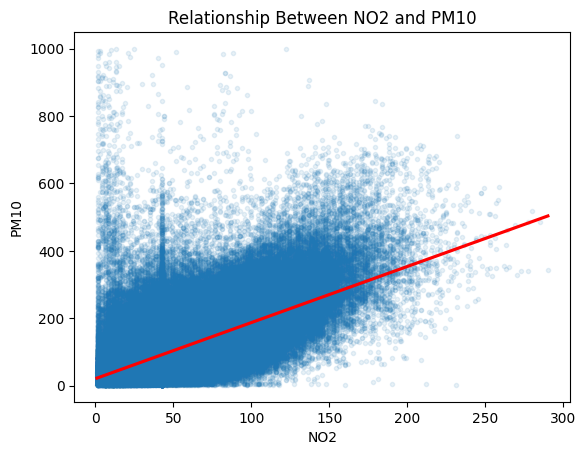

In [21]:
sns.regplot(x='NO2', y='PM10', data=data_air_train, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Relationship Between NO2 and PM10')
plt.show()

In [22]:
data_air_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

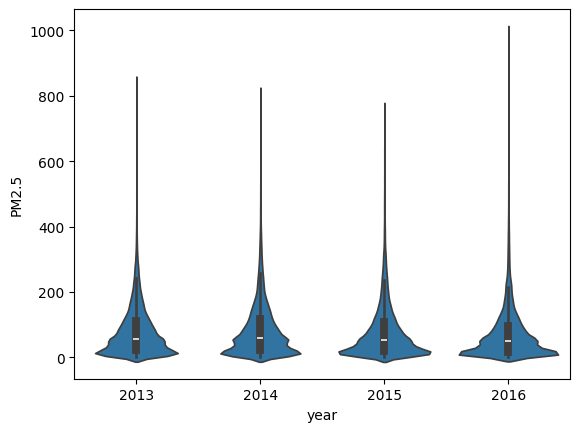

In [23]:
sns.violinplot(x="year", y="PM2.5", data=data_air_train)
plt.show()

yearly Analysis

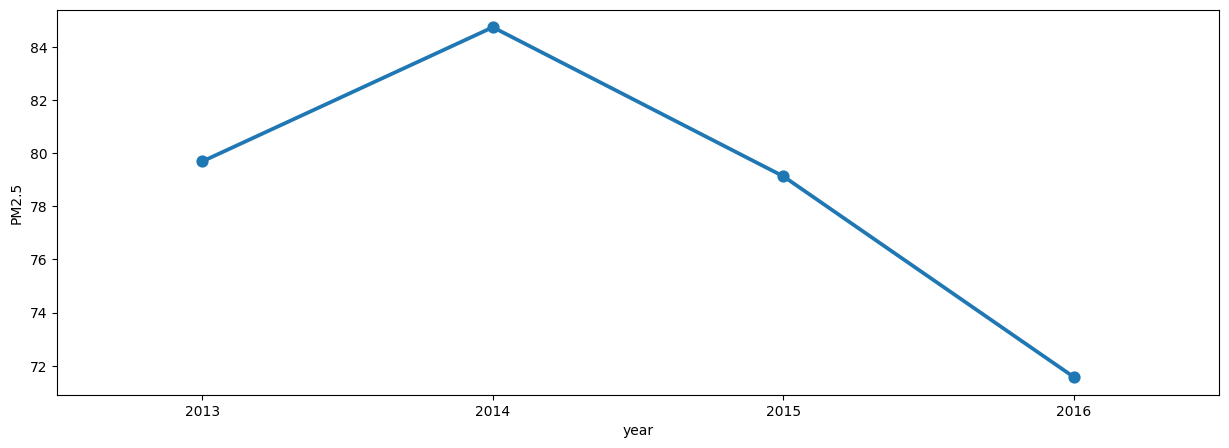

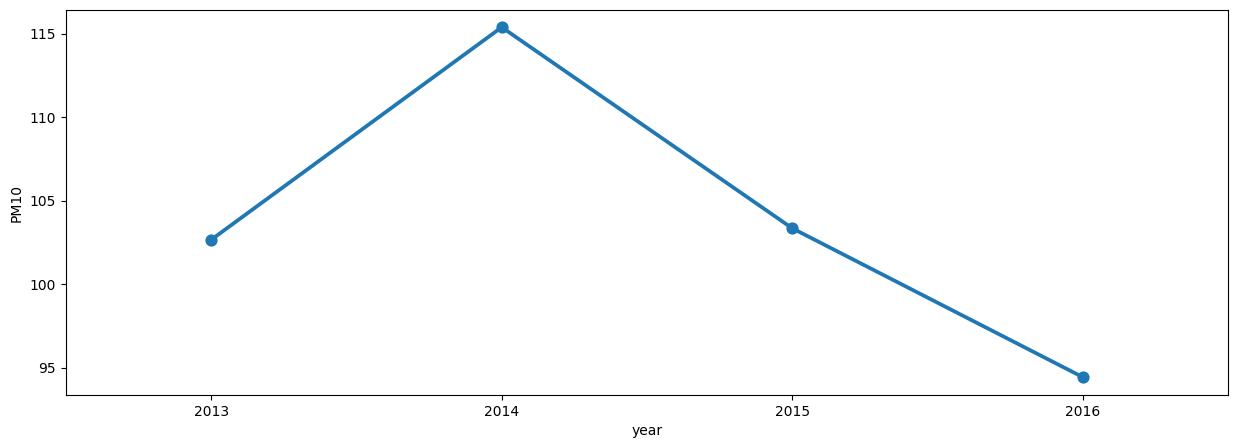

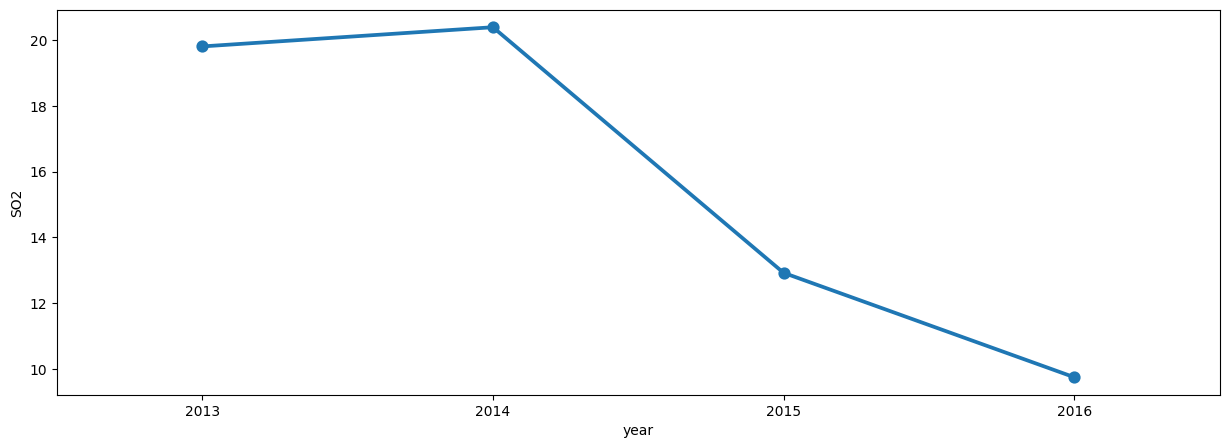

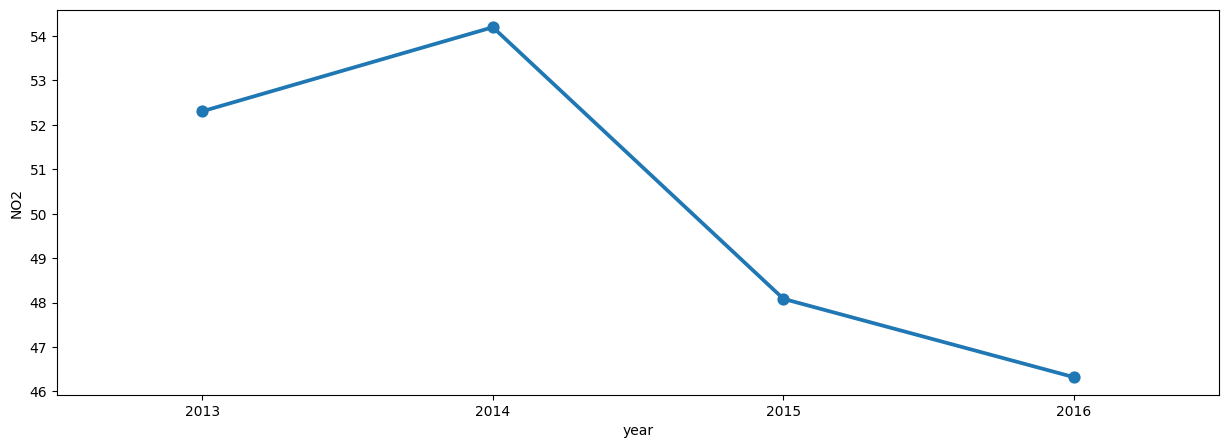

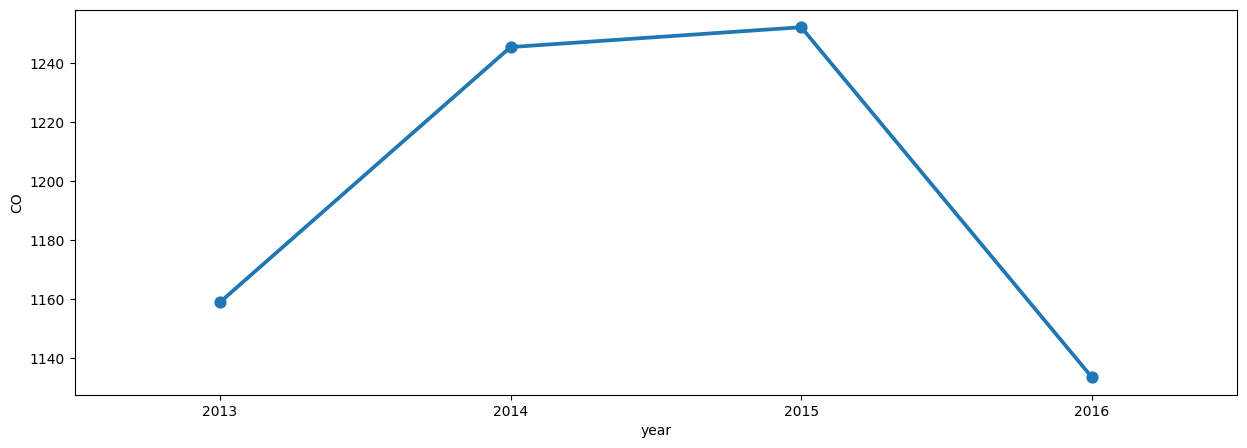

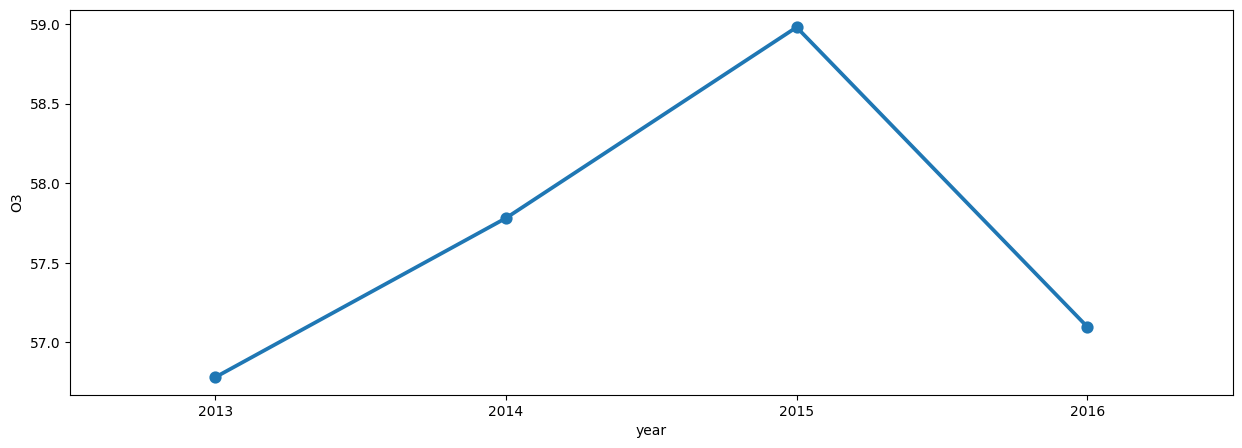

In [24]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in compounds:
    data_air_train1 = data_air_train[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=data_air_train1)

monthly Analysis


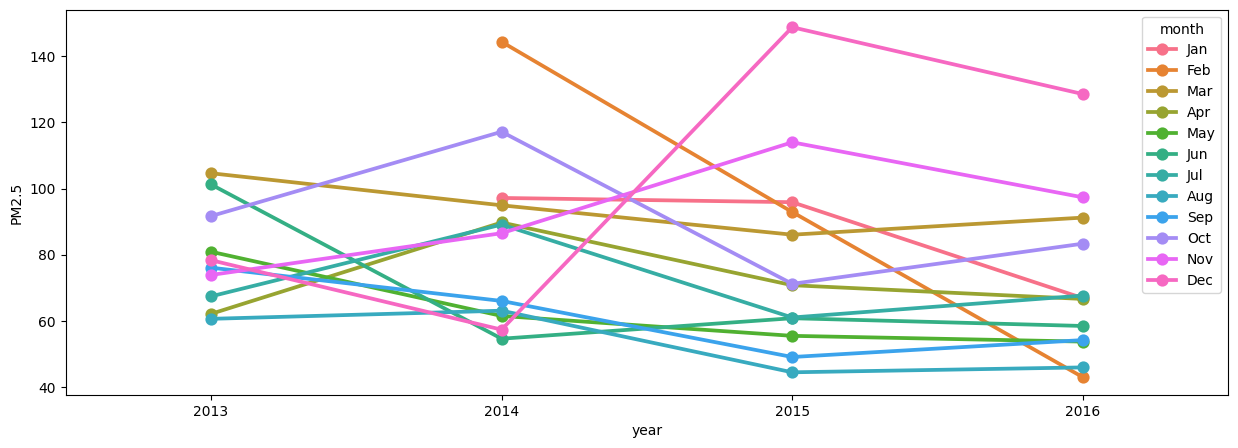

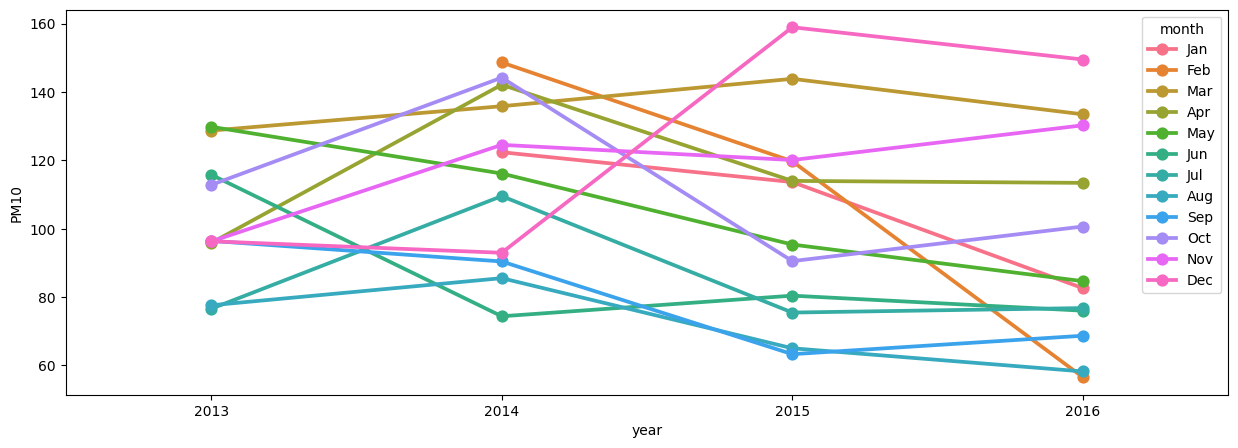

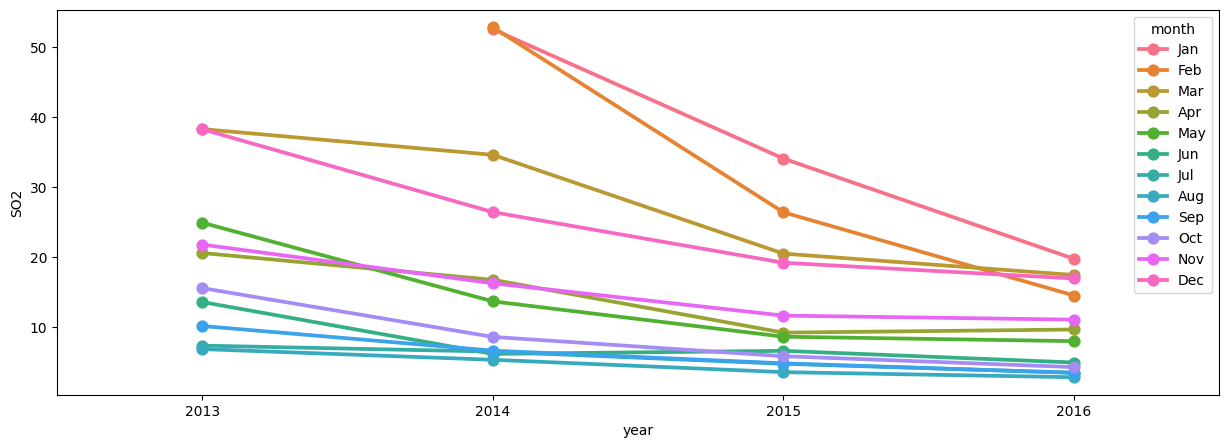

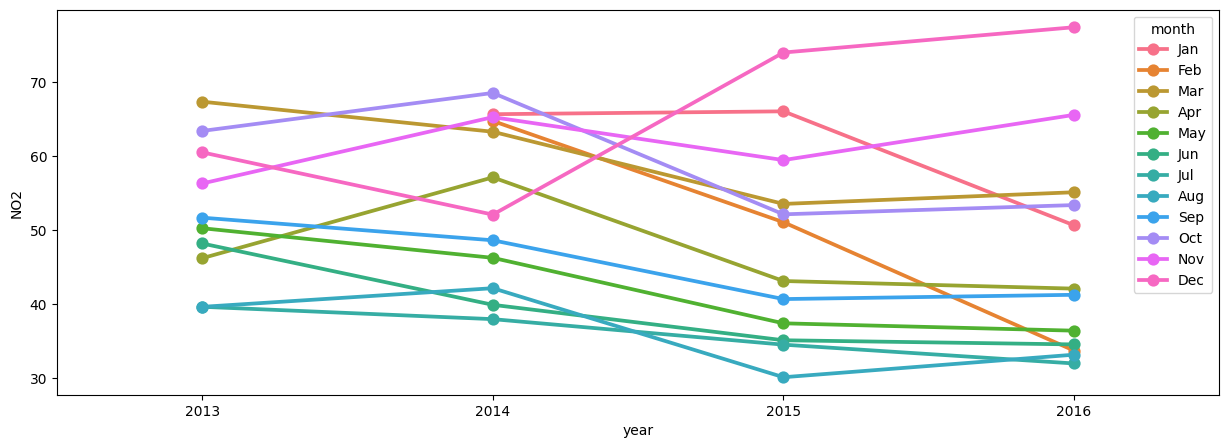

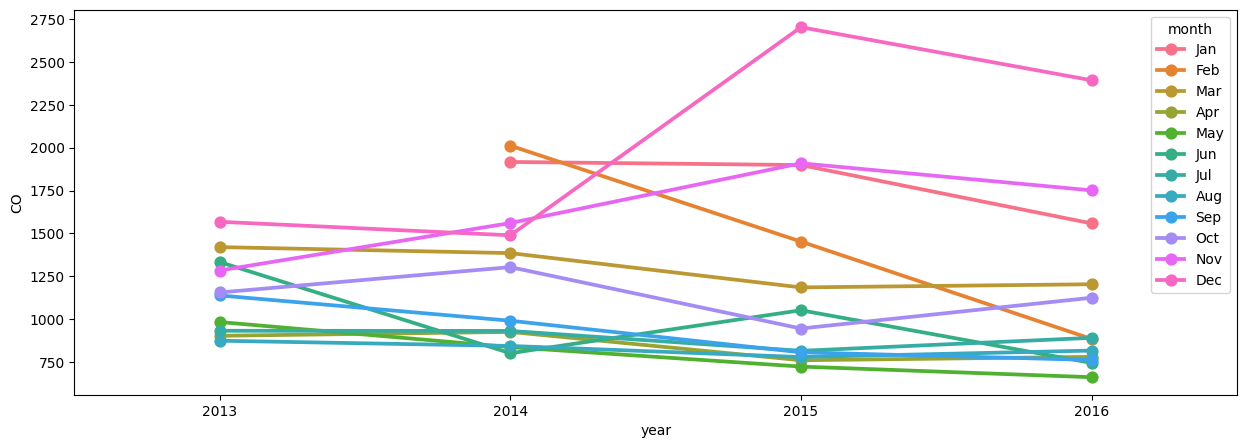

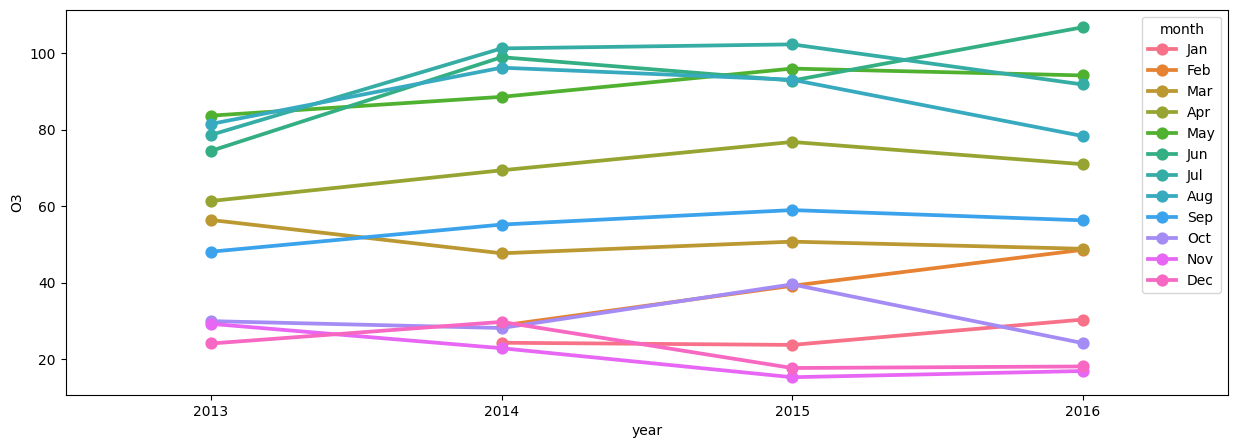

In [25]:
for i in compounds:
    temp_data = data_air_train.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    data_air_train1 = temp_data[[i, 'month', 'year',]].groupby(["year", "month"]).mean().reset_index().sort_values(by=['year','month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=data_air_train1, hue='month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

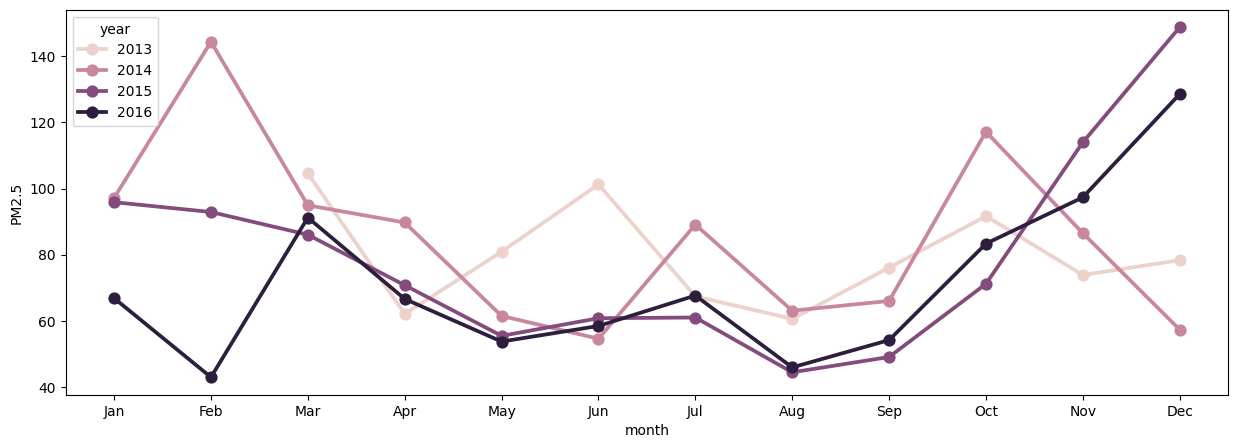

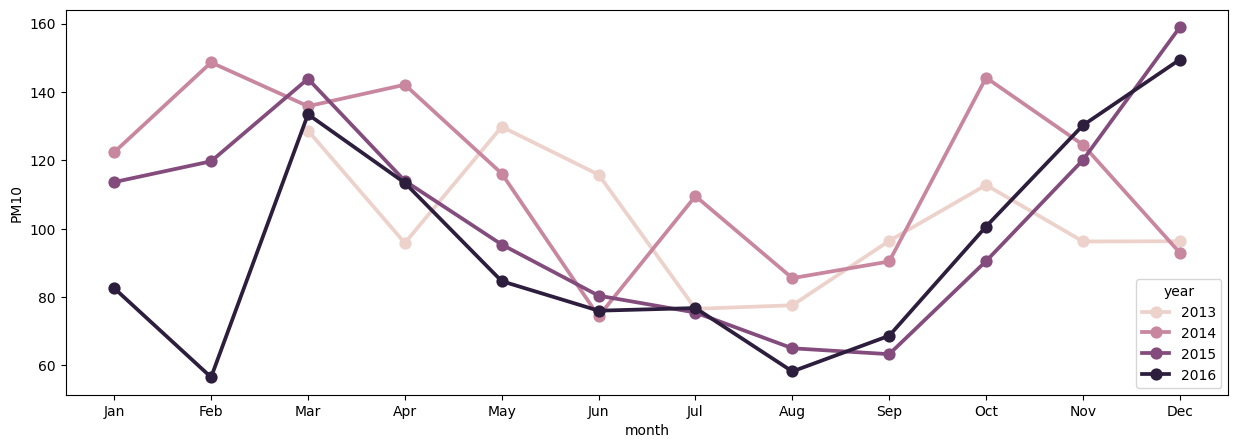

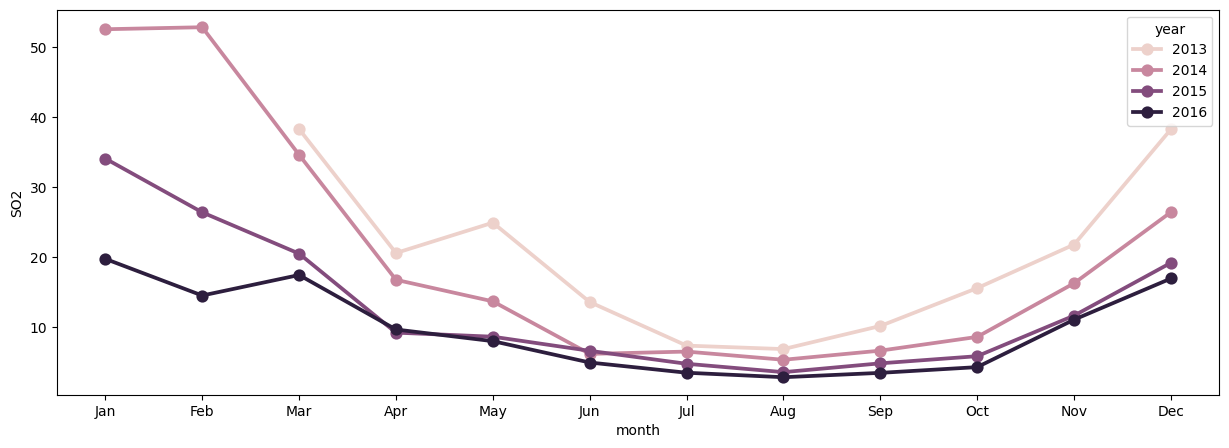

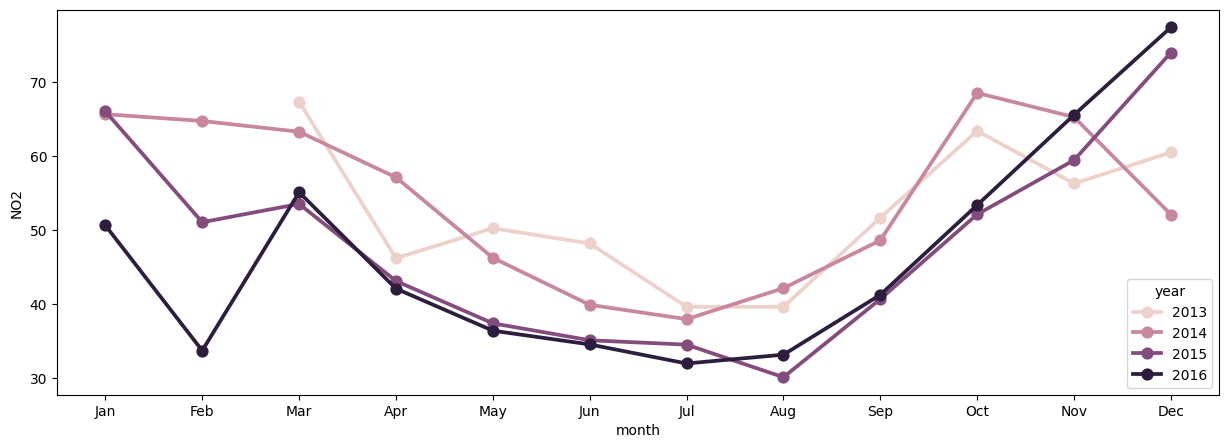

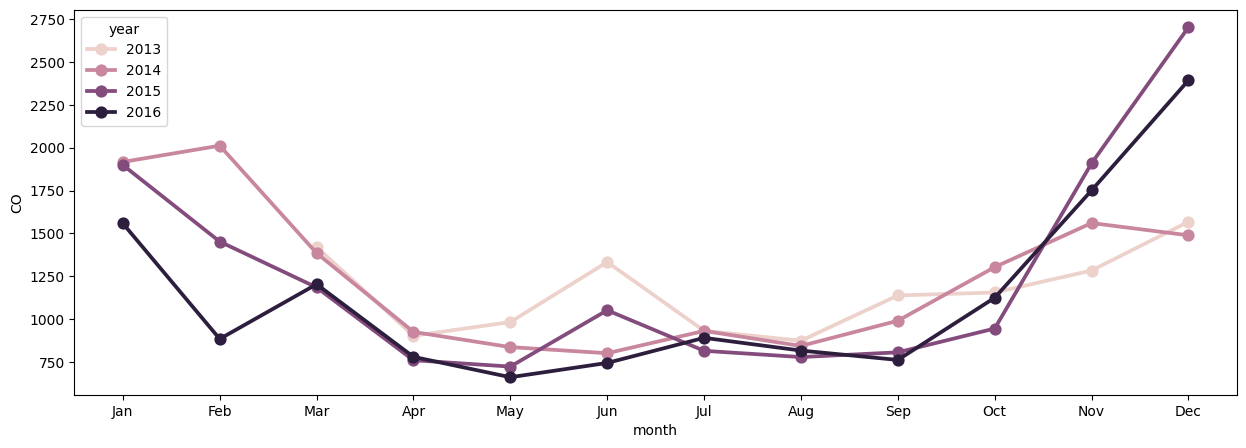

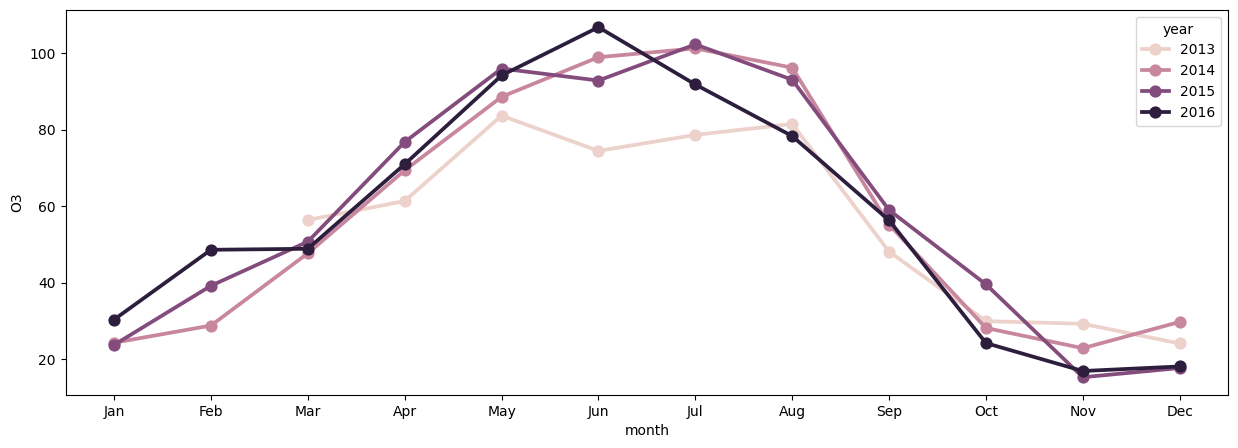

In [26]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}

for i in compounds:
    temp_data = data_air_train.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    data_air_train1 = temp_data[[i, 'month', 'year']].groupby(["year","month"]).mean().reset_index().sort_values(by=['year','month'], ascending=True)
    data_air_train1 = data_air_train1.iloc[data_air_train1['month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='month', y=i, data=data_air_train1, hue="year")

station Based Analysis

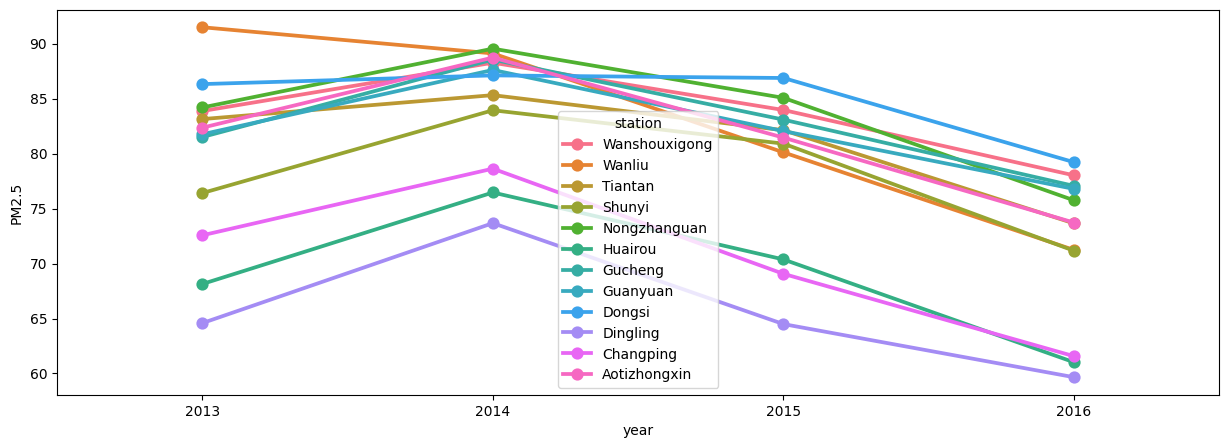

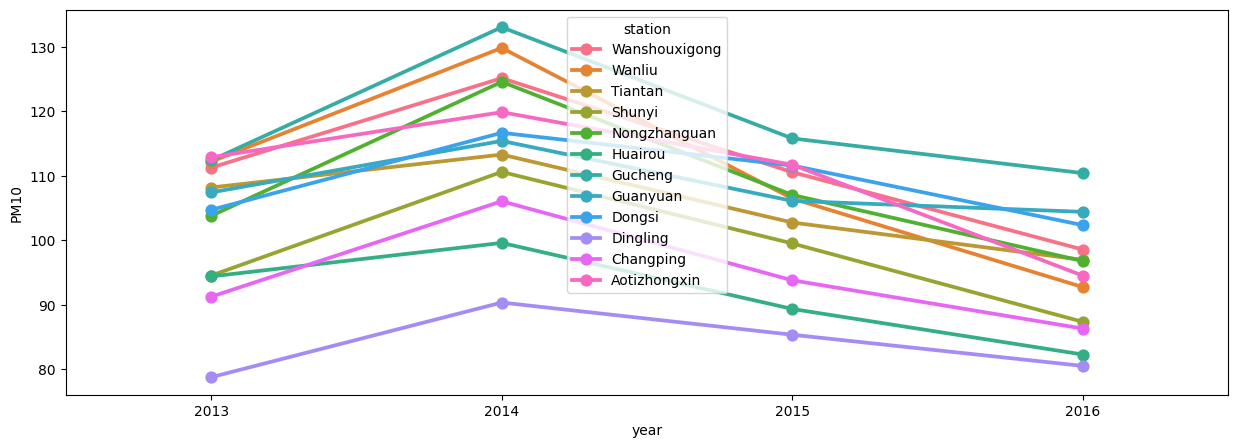

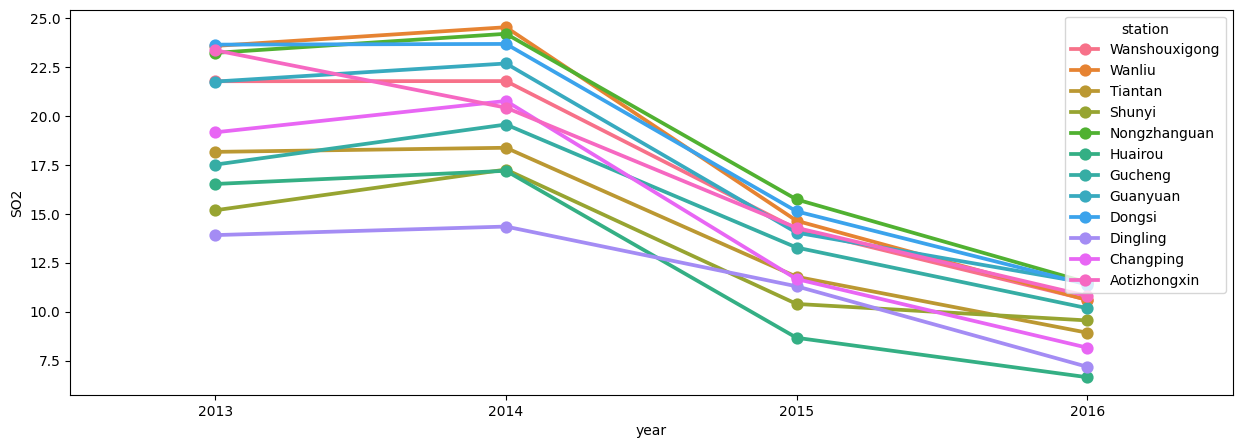

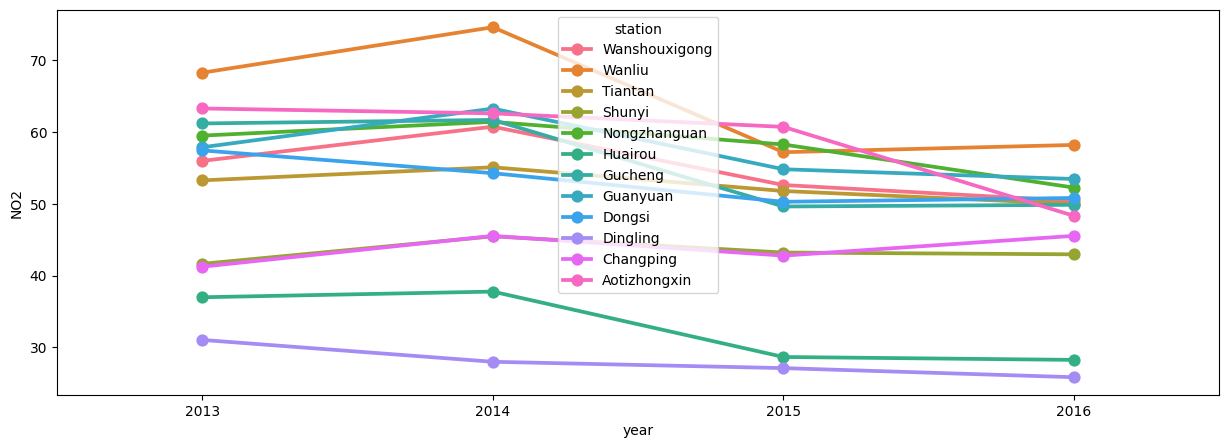

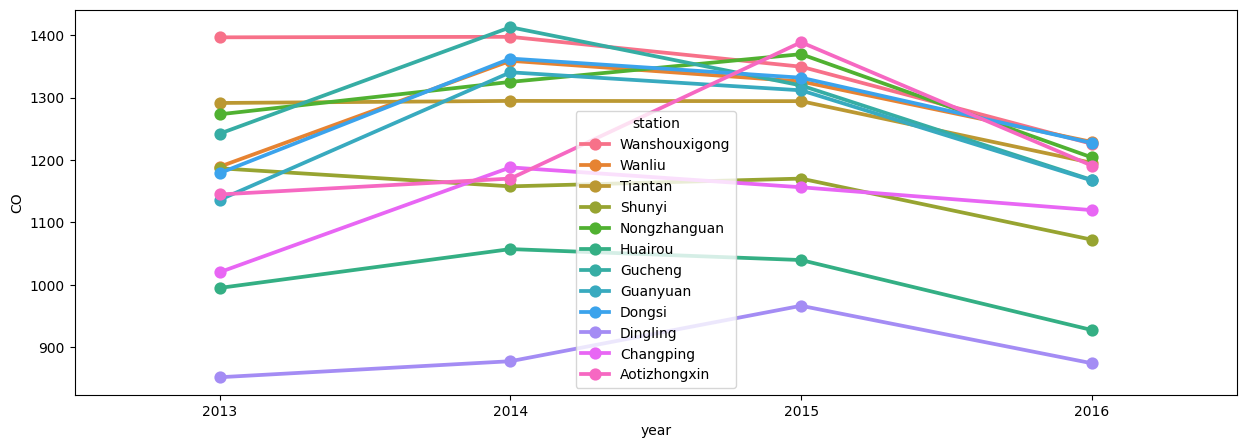

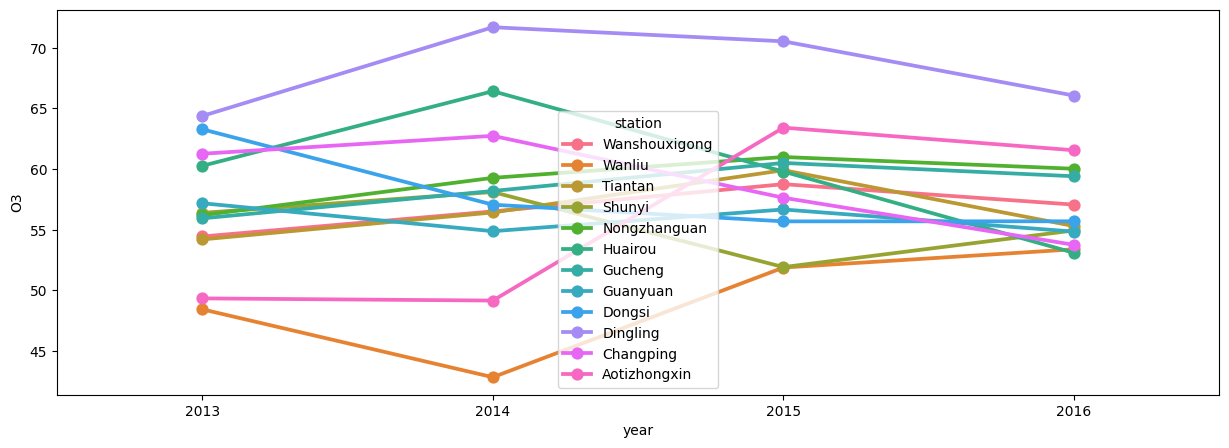

In [27]:
for i in compounds:
    data_air_train1 = data_air_train[[i, 'year', 'station']].groupby(["year","station"]).mean().reset_index().sort_values(by=['station','year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=data_air_train1, hue="station")
    plt.show()


Label Encoding

In [28]:
#data_air_train.drop(['year','month','Day','Hour','PM10','dateInt','Date','date'], axis=1, inplace=True)
data_air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403776 non-null  float64
 13  DEWP     403776 non-null  float64
 14  RAIN     403776 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403776 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [29]:
data_air_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [30]:
data_air_test.shape

(16728, 17)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]):
        print(f'{i}  ->  {j}')
    return labelColumn

In [33]:
categorical_variables = ["wd", "station"]

for i in categorical_variables:
    print(f"For {i} column ")
    data_air_train[f'{i}'] = labelEncoder(data_air_train[f'{i}'])
    print("******************")

For wd column 
Encoding Approach:
NNW  ->  6
N  ->  3
NW  ->  7
NNE  ->  5
ENE  ->  1
E  ->  0
NE  ->  4
W  ->  13
SSW  ->  11
WSW  ->  15
SE  ->  9
WNW  ->  14
SSE  ->  10
ESE  ->  2
S  ->  8
SW  ->  12
nan  ->  16
******************
For station column 
Encoding Approach:
Aotizhongxin  ->  0
Changping  ->  1
Dingling  ->  2
Dongsi  ->  3
Guanyuan  ->  4
Gucheng  ->  5
Huairou  ->  6
Nongzhanguan  ->  7
Shunyi  ->  8
Tiantan  ->  9
Wanliu  ->  10
Wanshouxigong  ->  11
******************


In [34]:
categorical_variables1 = ["wd", "station"]

for i in categorical_variables:
    print(f"For {i} column ")
    data_air_test[f'{i}'] = labelEncoder(data_air_test[f'{i}'])
    print("******************")

For wd column 
Encoding Approach:
ENE  ->  1
E  ->  0
ESE  ->  2
NE  ->  4
WSW  ->  15
SSW  ->  11
SSE  ->  10
S  ->  8
SE  ->  9
SW  ->  12
N  ->  3
NW  ->  7
NNW  ->  6
NNE  ->  5
WNW  ->  14
W  ->  13
******************
For station column 
Encoding Approach:
Aotizhongxin  ->  0
Changping  ->  1
Dingling  ->  2
Dongsi  ->  3
Guanyuan  ->  4
Gucheng  ->  5
Huairou  ->  6
Nongzhanguan  ->  7
Shunyi  ->  8
Tiantan  ->  9
Wanliu  ->  10
Wanshouxigong  ->  11
******************


In [35]:
data_air_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.00,8.00,121.00,6100.00,4.00,-4.70,1022.10,-6.10,0.00,1,1.00,0
1,33650,2017,1,1,1,497.00,7.00,113.00,6300.00,4.00,-5.20,1022.30,-6.40,0.00,0,0.70,0
2,33651,2017,1,1,2,469.00,7.00,111.00,6200.00,4.00,-5.40,1022.50,-6.50,0.00,1,1.10,0
3,33652,2017,1,1,3,425.00,6.00,109.00,5900.00,3.00,-5.20,1022.50,-6.20,0.00,0,1.10,0
4,33653,2017,1,1,4,468.00,10.00,123.00,7700.00,16.00,-5.00,1021.90,-5.80,0.00,1,1.00,0


Importing the Libraries

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

Train Test Split

In [37]:
x = data_air_train.drop('PM2.5', axis=1)
y = data_air_train['PM2.5']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=128)

In [39]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (323020, 17)
y_train: (323020,)
x_test: (80756, 17)
y_test: (80756,)


In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

###  Predict PM2.5 for the test set

In [41]:
y_pred = lr.predict(x_test)

In [42]:
rmse = mean_squared_error(y_test,y_pred, squared= False)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 31.60


In [43]:
test_df = pd.DataFrame(data_air_test)

In [44]:
test_predictions = lr.predict(test_df)
print("Predicted PM2.5 for the test set:")
print(test_predictions)

Predicted PM2.5 for the test set:
[4.07001574e+02 4.10793636e+02 3.93316068e+02 ... 5.29525749e+00
 1.48797350e+00 3.69207797e-01]


In [45]:
test_predictions.dtype

dtype('float64')

In [46]:
selected_df = pd.DataFrame(test_predictions)

In [47]:
selected_df.shape

(16728, 1)

In [48]:
data_air_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.00,8.00,121.00,6100.00,4.00,-4.70,1022.10,-6.10,0.00,1,1.00,0
1,33650,2017,1,1,1,497.00,7.00,113.00,6300.00,4.00,-5.20,1022.30,-6.40,0.00,0,0.70,0
2,33651,2017,1,1,2,469.00,7.00,111.00,6200.00,4.00,-5.40,1022.50,-6.50,0.00,1,1.10,0
3,33652,2017,1,1,3,425.00,6.00,109.00,5900.00,3.00,-5.20,1022.50,-6.20,0.00,0,1.10,0
4,33653,2017,1,1,4,468.00,10.00,123.00,7700.00,16.00,-5.00,1021.90,-5.80,0.00,1,1.00,0


In [49]:
data_air_test.shape

(16728, 17)

In [50]:
combined_df = pd.concat([data_air_test['REF_NO'], selected_df], axis=1)

In [51]:
combined_df.head()

,REF_NO,0
0,33649,407.00
1,33650,410.79
2,33651,393.32
3,33652,363.44
4,33653,424.24


In [52]:
combined_df.to_csv('submission.csv', index=False, header=False)